# Capstone: supervised learning

__First__: Go out and find a dataset of interest. It could be from one of our recommended resources, some other aggregation, or scraped yourself. Just make sure it has lots of variables in it, including an outcome of interest to you.

__Second__: Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

__Third__: Model your outcome of interest. You should try several different approaches and really work to tune a variety of models before using the model evaluation techniques to choose what you consider to be the best performer. Make sure to think about explanatory versus predictive power and experiment with both.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration & Feature Selection

In [2]:
# I'll use the wine quality dataset from UC Irvaine data repository
df = pd.read_csv("winequality-red.csv", delimiter=';')
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [3]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Let's check weather there are missing values.

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no missing value in this dataset. Next, we will check the distributions of the features.

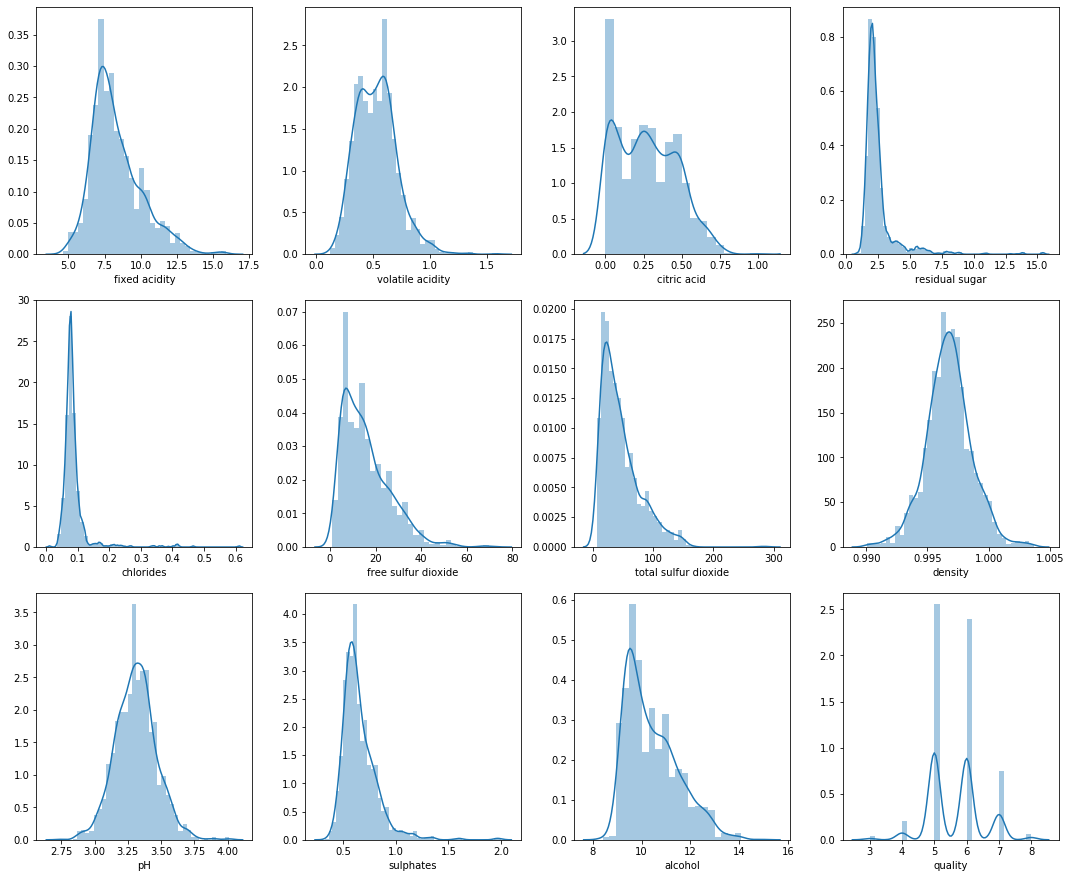

In [6]:
plt.figure(figsize=(15,20))

i =1
for column in df.columns:
    plt.subplot(5, 4, i)
    sns.distplot(df[column])
    i+=1
    
plt.tight_layout()
plt.show()

Only density and pH are close to normal distributions. Also, there are sharp discontinutities in quality. We don't have continuous data. No wine has a 3.5 rating, for example. We will turn quality which is our target variable into classification. We'll set ratings 7+ as "good".

In [7]:
#set ratings 5+ as "good"
good = df[df["quality"] >= 6]

#create new column "target", set values to 1
good["target"] = 1

#check it out
good.head()

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3            11.2              0.28         0.56             1.9      0.075   
7             7.3              0.65         0.00             1.2      0.065   
8             7.8              0.58         0.02             2.0      0.073   
16            8.5              0.28         0.56             1.8      0.092   
19            7.9              0.32         0.51             1.8      0.341   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3                  17.0                  60.0   0.9980  3.16       0.58   
7                  15.0                  21.0   0.9946  3.39       0.47   
8                   9.0                  18.0   0.9968  3.36       0.57   
16                 35.0                 103.0   0.9969  3.30       0.75   
19                 17.0                  56.0   0.9969  3.04       1.08   

    alcohol  quality  target  
3       9.8        6       1  
7      10.0        7       1  
8       9.5        7       1  
16     10.5        7       1  
19      9.2        6       1

In [8]:
#set ratings 5+ as "good"
non_good = df[df["quality"] < 6]

#create new column "target", set values to 1
non_good["target"] =0

#check it out
non_good.head()

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  target  
0      9.4        5       0  
1      9.8        5       0  
2      9.8        5       0  
4      9.4        5       0  
5      9.4        5       0

Let's merge good and non good.

In [9]:
#Specify frames
frames = [good, non_good]

#Concatenate frames
merge = pd.concat(frames)

df2 = merge

#confirm changes
df2.head(1599)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3              11.2             0.280         0.56             1.9      0.075   
7               7.3             0.650         0.00             1.2      0.065   
8               7.8             0.580         0.02             2.0      0.073   
16              8.5             0.280         0.56             1.8      0.092   
19              7.9             0.320         0.51             1.8      0.341   
...             ...               ...          ...             ...        ...   
1582            6.1             0.715         0.10             2.6      0.053   
1583            6.2             0.460         0.29             2.1      0.074   
1589            6.6             0.725         0.20             7.8      0.073   
1594            6.2             0.600         0.08             2.0      0.090   
1597            5.9             0.645         0.12             2.0      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3                    17.0                  60.0  0.99800  3.16       0.58   
7                    15.0                  21.0  0.99460  3.39       0.47   
8                     9.0                  18.0  0.99680  3.36       0.57   
16                   35.0                 103.0  0.99690  3.30       0.75   
19                   17.0                  56.0  0.99690  3.04       1.08   
...                   ...                   ...      ...   ...        ...   
1582                 13.0                  27.0  0.99362  3.57       0.50   
1583                 32.0                  98.0  0.99578  3.33       0.62   
1589                 29.0                  79.0  0.99770  3.29       0.54   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1597                 32.0                  44.0  0.99547  3.57       0.71   

      alcohol  quality  target  
3         9.8        6       1  
7        10.0        7       1  
8         9.5        7       1  
16       10.5        7       1  
19        9.2        6       1  
...       ...      ...     ...  
1582     11.9        5       0  
1583      9.8        5       0  
1589      9.2        5       0  
1594     10.5        5       0  
1597     10.2        5       0  

[1599 rows x 13 columns]

In [10]:
#Check data types. All columns are numeric so no changes needed.
df2.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
target                    int64
dtype: object

In [11]:
print("Good wines: ", (df2["target"] == 1).sum())
print("Non good wines: ", (df2["target"] == 0).sum())

df3= df2.drop(["quality"],1)
df3.describe()

Good wines:  855
Non good wines:  744


fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol       target  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     0.534709  
std       0.154386     0.169507     1.065668     0.498950  
min       2.740000     0.330000     8.400000     0.000000  
25%       3.210000     0.550000     9.500000     0.000000  
50%       3.310000     0.620000    10.200000     1.000000  
75%       3.400000     0.730000    11.100000     1.000000  
max       4.010000     2.000000    14.900000     1.000000

Now, let's take a look at how the features vary by target group. Also, use a t-test to compare means between target groups.

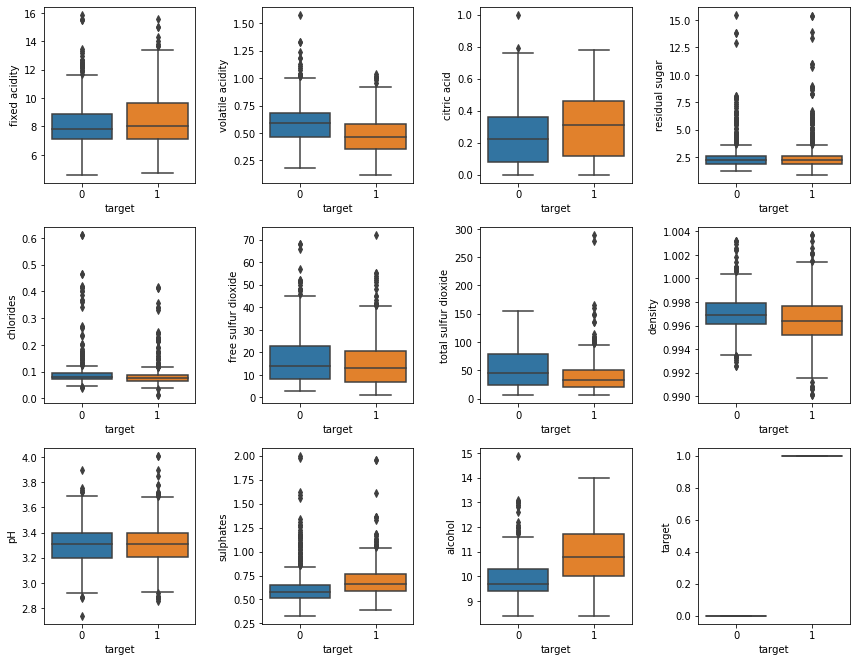

fixed acidity
Ttest_indResult(statistic=-3.817471367791021, pvalue=0.00013997664808333373) 

volatile acidity
Ttest_indResult(statistic=13.565500226382708, pvalue=9.33662078115107e-40) 

citric acid
Ttest_indResult(statistic=-6.441282695051292, pvalue=1.5637174967314769e-10) 

residual sugar
Ttest_indResult(statistic=0.08633714492778152, pvalue=0.9312092342607453) 

chlorides
Ttest_indResult(statistic=4.4021198412586635, pvalue=1.1431034803700567e-05) 

free sulfur dioxide
Ttest_indResult(statistic=2.472672557220334, pvalue=0.01351416693386121) 

total sulfur dioxide
Ttest_indResult(statistic=9.529743760506074, pvalue=5.623795874739862e-21) 

density
Ttest_indResult(statistic=6.44047541089984, pvalue=1.5718459861918855e-10) 

pH
Ttest_indResult(statistic=0.13043758140804423, pvalue=0.8962366625632214) 

sulphates
Ttest_indResult(statistic=-8.92959572307033, pvalue=1.1479293599999006e-18) 

alcohol
Ttest_indResult(statistic=-19.292349918694175, pvalue=1.0239802386368774e-74) 

target
Tt

In [12]:
plt.figure(figsize=(12,15))

i=1
for column in df3.columns:
    plt.subplot(5,4,i)
    sns.boxplot(x=df3["target"], y=df3[column],orient="v")
    i+=1
    
plt.tight_layout()
plt.show()

#Test for significance between groups
for col in df3.columns:
    print(col)
    print(stats.ttest_ind(
        df3[df3["target"] == 0][col],
        df3[df3["target"]==1][col]),"\n")

Now, let's check the correlation between features themselves.

In [13]:
# Inspect variable correlation for feature selection
corr_matrix = df3.corr()
print(corr_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates                  0.183006         -0.260987     0.312770   
alcohol                   -0.061668         -0.202288     0.109903   
target                     0.095093         -0.321441     0.159129   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

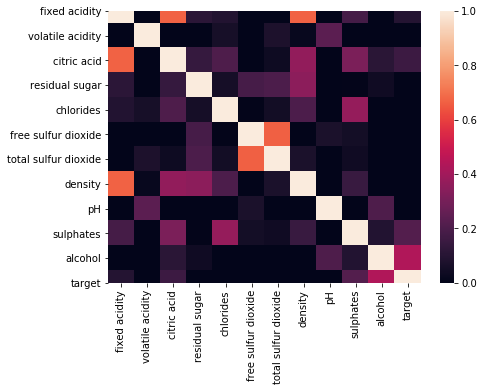

In [14]:
plt.figure(figsize=(7,5))
corr_matrix = df3.corr()
sns.heatmap(corr_matrix, vmin=0.0)
plt.show()

There are some strong correlationships.

 - citric acid x fixed acidity
 - density x fixed acidity
 - citric acid x density
 - density x residual sugar
 - sulphates x chlorides

## Model outcomes

Since our target is categorical value, We will explore:
    1. Naive Bayes
    2. Logistic Regression
    3. Decision Tree
    4. Random Forest
    5. Support Vector Classifier (SVC)
    6. K-Nearest Neighbor classifier (KNN classifier)

In [15]:
# Specify model inputs
X = df3.drop(columns=["target"])
y = df3['target']

# Verify shapes align
print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [16]:
# Import train/test/split
from sklearn.model_selection import train_test_split

#Split data, set test size to 30%
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=20)

#examine shape of data sets
print("Training size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

#Varify class balance in train/test sets
print(y_train.value_counts())
print(y_test.value_counts())

Training size: (1119, 11) (1119,)
Test size: (480, 11) (480,)
1    587
0    532
Name: target, dtype: int64
1    268
0    212
Name: target, dtype: int64


In [63]:
# Import some other performance metrics we'll use later on
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Let's explore some models.

### Naive Bayes

In [18]:
from sklearn.naive_bayes import BernoulliNB

#Create instance
bnb = BernoulliNB()

#Fit training data
bnb.fit(X_train, y_train)

#Predict with training set
y_pred_train = bnb.predict(X_train)

#Predict with test set
y_pred_test = bnb.predict(X_test)

#Get accuracy scores, 
print("NB training accuracy score:", round(accuracy_score(y_pred_train, y_train),3))
print("NB test accuracy score:", round(accuracy_score(y_pred_test, y_test),3))

NB training accuracy score: 0.539
NB test accuracy score: 0.542


Training accuracy is 53.9%, test accuracy is 54.2%. The model is not overfitted, but the performance is not so good.

In [19]:
#Confusion matrix training data
print("Confusion matrix training data: \n", confusion_matrix(y_train, y_pred_train), "\n")

# Classification metrics
print('Precision/Recall training data: \n', classification_report(y_train, y_pred_train))

Confusion matrix training data: 
 [[ 56 476]
 [ 40 547]] 

Precision/Recall training data: 
               precision    recall  f1-score   support

           0       0.58      0.11      0.18       532
           1       0.53      0.93      0.68       587

    accuracy                           0.54      1119
   macro avg       0.56      0.52      0.43      1119
weighted avg       0.56      0.54      0.44      1119



From left to right, top to bottom, the confusion matrix gives the breakdown of true negatives (TN), false positives (FP), false negatives(FN), and true positives(TP).

The classification report gives us precision, recall, and f-1 scores.

Precision is a measurement of the true positives relative to the total number of predicted positive values(547/1023), or conversely, the number of true negatives relative to the total numer of predicted negative values(56/96).

Recall (or sensitivity) is a measurement of the true positives relative to the total number of actual positive values(547/587), or conversely, the number of true negatives relative to the total number of actual negative values(56/532).

The F1 score combines precision and recall, providing the harmonic mean.

### Logistic Regression

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression training accuracy score: 0.745
Logistic regression test accuracy score: 0.733


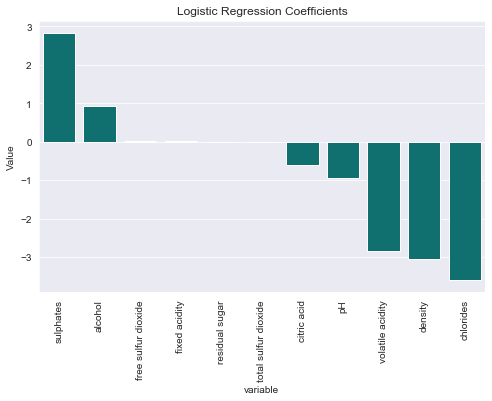

In [64]:
#Import model
from sklearn.linear_model import LogisticRegression

#Instantiate and set regularization coefficient to large value
lr = LogisticRegression(C=1e10)

#Fit model
fit = lr.fit(X_train, y_train)

print("Logistic regression training accuracy score:", round(lr.score(X_train, y_train), 3))
print("Logistic regression test accuracy score:", round(lr.score(X_test, y_test),3))

#Get coefficients, flatten, and send to list
coef_list=lr.coef_.ravel().tolist()

#Create new data frame with coefficients
coef=pd.DataFrame(data=coef_list, columns=["coef"])

#Add in variable names
coef["variable"] = list (X)

#sort by coefficient value
sorted_coef = coef.sort_values("coef", ascending=False)

#Plot
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x=sorted_coef["variable"], y=sorted_coef["coef"],color="teal")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.title("Logistic Regression Coefficients")

plt.show()

Logistic regression performed better than Naive Bayes and was not overfit. Here's what we see:

- Training accuracy was 74.5%
- Test accuracy was 73.3%
- Sulphates and alcohol had the strongest positive correlations
- Chlorides, density, and volatile acidity had the strongest negative correlations

Now let's look at regularization methods to see if we can improve the perfomance of our logistic regression. We'll automate the hyperparameter selection process by using grid search to select the best regularization method and coefficient.

In [67]:
from sklearn.model_selection import GridSearchCV

#Create a new instance for regularization
lr_reg = LogisticRegression()

#Specify regularization penalties
#l1=Lasso, l2 = Ridge
penalty = ["l1", "l2"]

#Specify regularrization hyperparameter range
C=np.logspace(3,11,5)

#set hyperparameters
hyperparameters=dict(
    C=C, 
    penalty=penalty
)

#create grid search using 5-fold cross validation
clf = GridSearchCV(lr_reg, hyperparameters, cv=5)

#Run grid search
results = clf.fit(X_train, y_train)

print('Best Penality:', results.best_estimator_.get_params()['penalty'])
print('Best C:', results.best_estimator_.get_params()['C'])
print('Best score:', round(results.best_score_, 3))

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

Best Penality: l1
Best C: 1000.0
Best score: 0.736


/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: 

/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic regression training accuracy score: 0.747
Logistic regression test accuracy score: 0.735


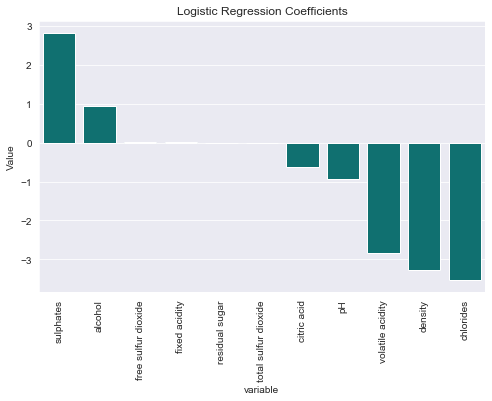

In [71]:
# Get hyperparameters from above
best_lr = LogisticRegression(
    C=C,
    penalty=penalty)

#Fit model
best_lr.fit(X_train, y_train)

print("Logistic regression training accuracy score:", round(best_lr.score(X_train, y_train), 3))
print("Logistic regression test accuracy score:", round(best_lr.score(X_test, y_test),3))

#Get coefficients, flatten, and send to list
coef_list=best_lr.coef_.ravel().tolist()

#Create new data frame with coefficients
coef=pd.DataFrame(data=coef_list, columns=["coef"])

#Add in variable names
coef["variable"] = list (X)

#sort by coefficient value
sorted_coef = coef.sort_values("coef", ascending=False)

#Plot
plt.figure(figsize=(8,5))
sns.set_style("darkgrid")
sns.barplot(x=sorted_coef["variable"], y=sorted_coef["coef"],color="teal")
plt.xticks(rotation=90)
plt.ylabel("Value")
plt.title("Logistic Regression Coefficients")

plt.show()

- Training accuracy was 74.7%, improved very slightly from 74.5%
- Test accuracy was 73.5%, improved very slightly from 73.3%
- Sulphates and alcohol had the strongest positive correlations
- Chlorides, density, and volatile acidity had the strongest negative correlations

### Decision tree

In [21]:
# Import model
from sklearn import tree

# Import relevant libraries
from IPython.display import Image
from sklearn import tree

# Import package for rendering tree
import pydotplus
from pydotplus import graphviz

In [22]:
#let's check best max depth and max features using a grid search for hyperparameter selection
#create instance, set criterion to entropy
decision_tree = tree.DecisionTreeClassifier(
    criterion="entropy",
    random_state=17)

#specify hyperparameter range
max_depth = np.arange(2, 10, 1)
max_features = np.arange(2, 12, 1)

#set hyperparameters
hyperparameters = dict(
    max_depth=max_depth, 
    max_features=max_features)

# Create grid search using 5-fold cross validation
clf=GridSearchCV(decision_tree, hyperparameters, cv=5)

#Run grid search
results=clf.fit(X_train, y_train)

print("Max depth: ", results.best_estimator_.get_params()["max_depth"])
print("Max features: ", results.best_estimator_.get_params()["max_features"])
print("Best score: ", round(results.best_score_,3))


Max depth:  9
Max features:  9
Best score:  0.736


/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Decision tree training accuracy:  0.903
Decision tree test accuracy:  0.729


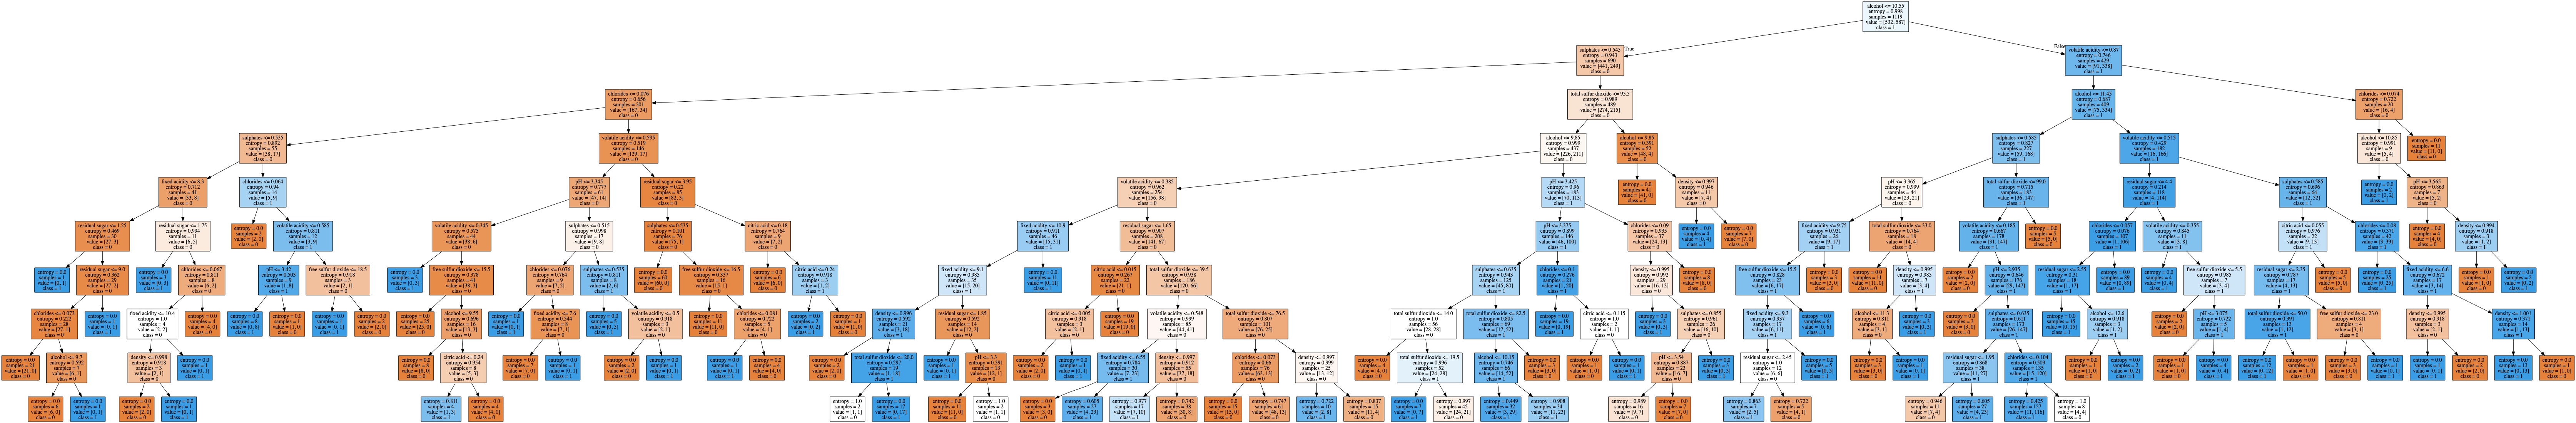

In [23]:
#Create model
best_decision_tree= tree.DecisionTreeClassifier(
    criterion="entropy", 
    max_depth=9, 
    max_features=9)

#Create model
best_decision_tree.fit(X_train, y_train)

print('Decision tree training accuracy: ', round(best_decision_tree.score(X_train, y_train), 3))
print('Decision tree test accuracy: ', round(best_decision_tree.score(X_test, y_test), 3))

#create tree graphic
dot_data = tree.export_graphviz(best_decision_tree, out_file=None, feature_names=X.columns, class_names=["0","1"],filled=True)

graph =pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

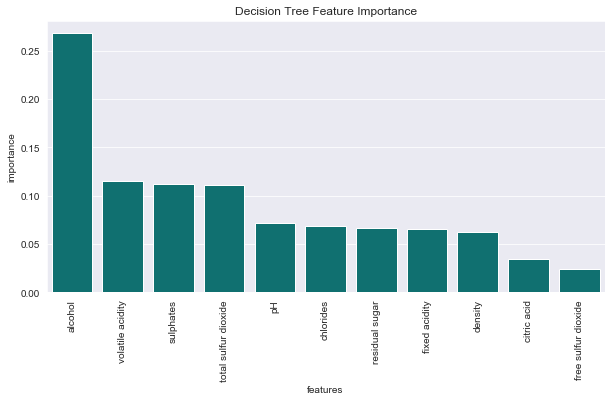

In [24]:
# Feature importance

# create new df to store features
best_tree_features = pd.DataFrame()
best_tree_features["importance"] = best_decision_tree.feature_importances_
best_tree_features["features"] = X.columns

#Sort descending
sorted_tree = best_tree_features.sort_values("importance", ascending=False)

#plot
plt.figure(figsize=(10, 5))
sns.set_style("darkgrid")
sns.barplot(x=sorted_tree["features"], y=sorted_tree["importance"], color="teal")
plt.title("Decision Tree Feature Importance")
plt.xticks(rotation=90)
plt.show()

It is very overfit as expected.

Here is what we learned from decision tree:

- Training accuracy was 90.3%
- Test accuracy was 72.9%
- Alchohol is the most important feature

### Random Forest

In [59]:
#This took too much time. Be careful before running this.
from sklearn import ensemble

#Create instance. Set # features to sqrt to total
forest = ensemble.RandomForestClassifier(
    random_state=17,
    max_features="sqrt"
)

#Specify hyperparameter range
criterion = ["entropy", "gini"]
n_estimators = np.arange(200, 300, 10)
max_depth = np.arange (8, 15, 1)

#set hyperparameters
hyperparameters=dict(
    criterion=criterion,
    n_estimators=n_estimators, 
    max_depth=max_depth)

#Create grid search using 5-fold cross validation
clf=GridSearchCV(forest, hyperparameters, cv=5)

#Run grid search
results = clf.fit(X_train, y_train)

print("Criterion: ", results.best_estimator_.get_params()["criterion"])
print("n estimators: ", results.best_estimator_.get_params()["n_estimators"])
print("Max depth: ", results.best_estimator_.get_params()["max_depth"])
print("Best score: ", round(results.best_score_,3))

Criterion:  gini
n estimators:  240
Max depth:  10
Best score:  0.805


In [61]:
forest = ensemble.RandomForestClassifier(
    criterion="gini",
    n_estimators=240,
    max_depth=10
)

forest.fit(X_train, y_train)

print("Forest training score: ", round(forest.score(X_train, y_train),3))
print("Forest test score: ", round(forest.score(X_test, y_test),3))

Forest training score:  0.984
Forest test score:  0.794


Text(0.5, 1.0, 'Random Forest')

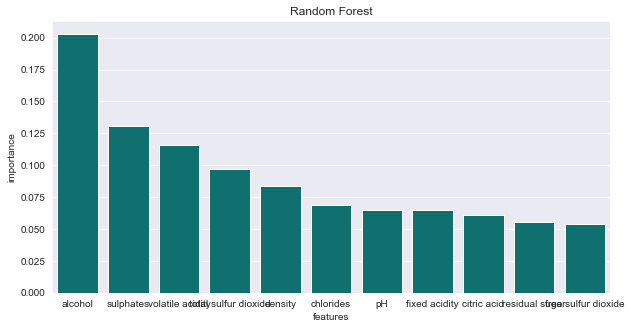

In [73]:
forest_features = pd.DataFrame()
forest_features["importance"] = forest.feature_importances_
forest_features["features"] = X.columns
sorted_forest = forest_features.sort_values("importance", ascending=False)

plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.barplot(x=sorted_forest["features"], y=sorted_forest["importance"], color="teal")
plt.title("Random Forest")

It slightly improved score compared to single decision tree. Also, I thought we can combat overfitting seen in a single decision tree. But it is still overfitting.

- Training accuracy was 98.4%
- Test accuracy was 79.4%
- Alcohol was the most important feature

### SVC (Support Vector Classifier)

In [74]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(X_train, y_train)

print("Forest training score: ", round(svc.score(X_train, y_train),3))
print("Forest test score: ", round(svc.score(X_test, y_test),3))

Forest training score:  0.865
Forest test score:  0.706


/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [47]:
from sklearn.svm import SVC

#create instance, set criterion to entropy
svc = SVC()

#specify hyperparameter range
C = np.arange(0.1, 2.0, 1)
kernel= ["linear", "rbf"]
gamma = np.arange(0.1, 2.0, 1)

#set hyperparameters
hyperparameters = dict(
    C=C, 
    kernel=kernel,
    gamma=gamma)

# Create grid search using 5-fold cross validation
clf=GridSearchCV(svc, hyperparameters, cv=5)

#Run grid search
results=clf.fit(X_train, y_train)

print("C: ", results.best_estimator_.get_params()["C"])
print("kernel:" , results.best_estimator_.get_params()["kernel"])
print("gamma: ", results.best_estimator_.get_params()["gamma"])
print("Best score: ", round(results.best_score_,3))


C:  1.1
kernel: linear
gamma:  0.1
Best score:  0.734


In [50]:
best_svc = SVC(
    C=1.1, 
    kernel="linear",
    gamma=0.1)

best_svc.fit(X_train, y_train)

print("SVC training score: ", round(best_svc.score(X_train, y_train),3))
print("SVC test score: ", round(best_svc.score(X_test, y_test),3))

SVC training score:  0.742
SVC test score:  0.735


The model performs decently. Also, it's not overfitting.

- Training accuracy was 74.2%
- Test accuracy was 73.5%


### K-Nearest neighbor

In [55]:
from sklearn.neighbors import KNeighborsClassifier

#create instance, set criterion to entropy
knn = KNeighborsClassifier()

#specify hyperparameter range
n_neighbors = np.arange(1, 100, 1)
weights = ["uniform", "distance"]

#set hyperparameters
hyperparameters = dict(
    n_neighbors = n_neighbors, 
    weights=weights
)

# Create grid search using 5-fold cross validation
clf=GridSearchCV(knn, hyperparameters, cv=5)

#Run grid search
results=clf.fit(X_train, y_train)

print("n neighbors: ", results.best_estimator_.get_params()["n_neighbors"])
print("weight:" , results.best_estimator_.get_params()["weights"])
print("Best score: ", round(results.best_score_,3))

n neighbors:  17
weight: distance
Best score:  0.724


/Users/yutakatsuyama/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [76]:
best_knn = KNeighborsClassifier(
    n_neighbors=17,
    weights="distance"
)

best_knn.fit(X_train, y_train)

print("KNN training score: ", round(best_knn.score(X_train, y_train),3))
print("KNN test score: ", round(best_knn.score(X_test, y_test),3))

KNN training score:  1.0
KNN test score:  0.748


The grid search indicates distance weighting using the 17 nearest neighbors performs the best. However, the model is very overfit. Let's use the same number of neighbors but with uniform weighing to see if we can reduce overfitting.

In [75]:
best_knn = KNeighborsClassifier(
    n_neighbors=17,
    weights="uniform"
)

best_knn.fit(X_train, y_train)

print("KNN training score: ", round(best_knn.score(X_train, y_train),3))
print("KNN test score: ", round(best_knn.score(X_test, y_test),3))

KNN training score:  0.71
KNN test score:  0.683


It is less overfit than the weighted model, however the score is lower than the weighted model. 

- Weighted:
    - Training accuracy: 100%
    - Test accuracy: 74.8%
    
- Unweighted (uniform):
    - Training accuracy: 71%
    - Test accuracy: 68.3%

## Conclusions

We've built a classifier to predict whether or not the wine is good based on features.　Also, the secondary objective was to understand what is important for make the wine good.

We explored:

1. Naive Bayes (54.2%)
2. Logistic Regression(73.5%)
3. Decision Tree(72.9%)
4. Random Forest(79.4%)
5. Support Vector Classifier (73.5%)
6. K-Nearest Neighbor classifier (68.3%)

Overall, model accuracy ranged from 54 ~ 80%. The best performing model was Random forest, however, based on overfitting, I think SVC was the most stable model. Regarding the secondary objective, we saw alcohol is the most important features for making the wine good.